### Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.

### Data Set
The Book-Crossing dataset comprises 3 files.

#### 1. Users -
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

#### 2. Books -
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

#### 3.Ratings -
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Datasets
books_df = pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Projects\\P-186- Book Recommendation\\Dataset (1)\\Books.csv")
users_df = pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Projects\\P-186- Book Recommendation\\Dataset (1)\\Users.csv")
ratings_df = pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Projects\\P-186- Book Recommendation\\Dataset (1)\\Ratings.csv")

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Rename the columns
books = books_df.rename(columns={
    'ISBN': 'isbn',
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-S': 'image_url_s',
    'Image-URL-M': 'image_url_m',
    'Image-URL-L': 'image_url_l'
})

# Check the new column names
print(books.columns)

Index(['isbn', 'title', 'author', 'year', 'publisher', 'image_url_s',
       'image_url_m', 'image_url_l'],
      dtype='object')


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Rename the columns
users = users_df.rename(columns={
    'User-ID': 'userid',
    'Location': 'location',
    'Age': 'age',
})

# Check the new column names
print(users.columns)

Index(['userid', 'location', 'age'], dtype='object')


In [7]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Rename the columns
ratings = ratings_df.rename(columns={
    'User-ID': 'userid',
    'ISBN': 'isbn',
    'Book-Rating': 'rating',
})

# Check the new column names
print(ratings.columns)

Index(['userid', 'isbn', 'rating'], dtype='object')


## Descriptive Statistics

In [9]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   isbn         271360 non-null  object
 1   title        271360 non-null  object
 2   author       271359 non-null  object
 3   year         271360 non-null  object
 4   publisher    271358 non-null  object
 5   image_url_s  271360 non-null  object
 6   image_url_m  271360 non-null  object
 7   image_url_l  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
books.isnull().sum()

isbn           0
title          0
author         1
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    3
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userid    278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users.isnull().sum()

userid           0
location         0
age         110762
dtype: int64

In [15]:
# Number of missing values in age column
num_missing=users['age'].isnull().sum()
num_missing

110762

In [16]:
# missing values in percentage
percent_missing=(num_missing/len(users))*100
print(percent_missing)

39.71985741847105


In [17]:
users.duplicated().sum()

0

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userid  1149780 non-null  int64 
 1   isbn    1149780 non-null  object
 2   rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
ratings.isnull().sum()

userid    0
isbn      0
rating    0
dtype: int64

In [20]:
ratings.duplicated().sum()

0

## Exploratory Data Analysis

### Books

In [21]:
# Change the data type of the year column to int
# Change the data type of the publication_year column to int
books['year'] = pd.to_numeric(books['year'], errors='coerce')
books = books[~books['year'].isna()]
books['year'] = books['year'].astype(int)

In [22]:
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [23]:
books.year.describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: year, dtype: float64

In [24]:
books.isna().sum()

isbn           0
title          0
author         1
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

- There is 1 null value in Author column
- 2 missing values in publisher column

In [25]:
author_na=pd.isnull(books['author'])
books[author_na]

,isbn,title,author,year,publisher,image_url_s,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [26]:
# finding the missing auther name from external refference and replacing
books.loc[187689, 'author'] = 'Larissa Anne Downes'

In [27]:
publisher_na=pd.isnull(books["publisher"])
books[publisher_na]

,isbn,title,author,year,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [28]:
# finding the missing publisher name from external refference and replacing
books.loc[128890,'publisher']='Novelbooks Inc'
books.loc[129037,'publisher']='Bantam'

In [29]:
books.isna().sum()

isbn           0
title          0
author         0
year           0
publisher      0
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

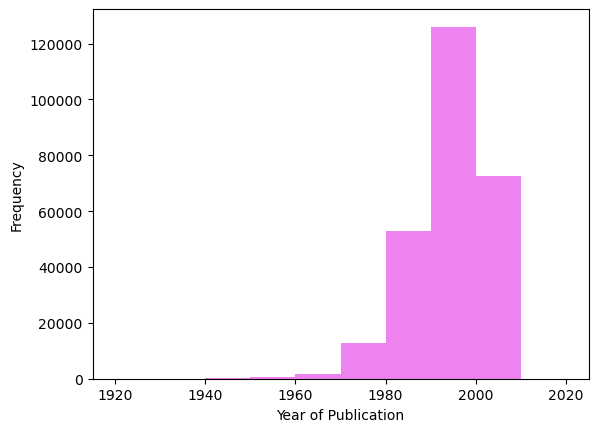

In [30]:
# Check the distribution of the year of publication
plt.hist(books['year'], bins=range(1920, 2030, 10),color="violet")
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Top 10 authors
print("Top 10 Authors-")
print("\n")

top_authors = books['author'].value_counts().head(10)
print(top_authors)

print("\n")

# Top 10 publishers
print("Top 10 Publishers-")
print("\n")

top_publishers = books['publisher'].value_counts().head(10)
print(top_publishers)

Top 10 Authors-


Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: author, dtype: int64


Top 10 Publishers-


Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


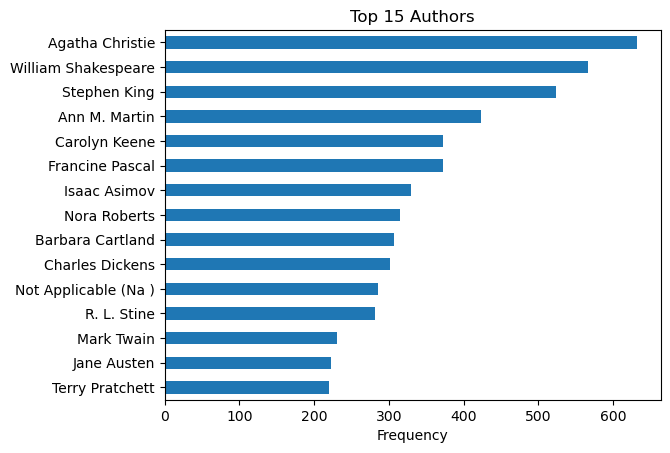

In [32]:
# Identify popular authors
import matplotlib.pyplot as plt

# Top 15 authors
popular_authors = books['author'].value_counts().head(15)
popular_authors.plot.barh()
plt.xlabel('Frequency')
plt.title('Top 15 Authors')

# Reverse the y-axis to show the bars in descending order
plt.gca().invert_yaxis()
    
plt.show()

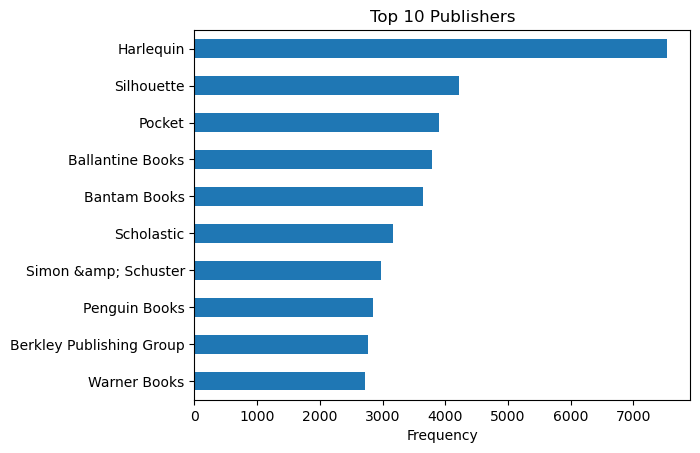

In [33]:
# Top 10 Publishers
popular_publishers = books['publisher'].value_counts().head(10)
popular_publishers.plot.barh()
plt.xlabel('Frequency')
plt.title('Top 10 Publishers')

# Reverse the y-axis to show the bars in descending order
plt.gca().invert_yaxis()
    
plt.show()

In [34]:
books

,isbn,title,author,year,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### Users

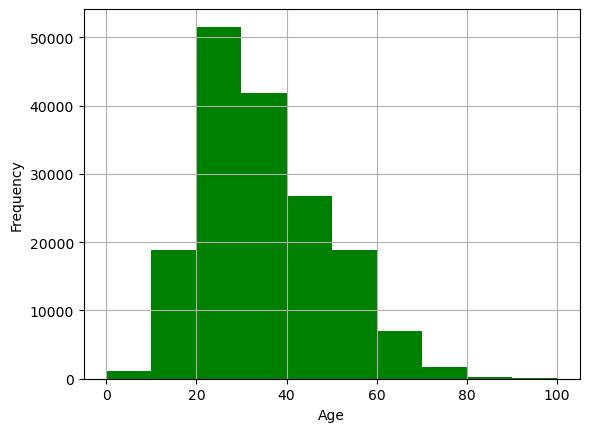

In [35]:
# Check the distribution of age
users['age'].hist(bins=range(0, 110, 10),color="green")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [36]:
median_age=users['age'].median()
median_age

32.0

In [37]:
# Replacing all null values with median
users['age']=users['age'].fillna(median_age)
users['age'].isnull().sum()

0

In [38]:
def age_group(age):
    if age<18:
        x='Children'
    elif age>=18 and age<35:
        x='Youth'
    elif age>=35 and age<65:
        x='Adults'
    else:
        x='Senior Citizens'
    return x

In [39]:
users['age_group']=users['age'].apply(lambda x: age_group(x))
users.head()

,userid,location,age,age_group
0,1,"nyc, new york, usa",32.0,Youth
1,2,"stockton, california, usa",18.0,Youth
2,3,"moscow, yukon territory, russia",32.0,Youth
3,4,"porto, v.n.gaia, portugal",17.0,Children
4,5,"farnborough, hants, united kingdom",32.0,Youth


Text(0.5, 1.0, 'Age Distribution')

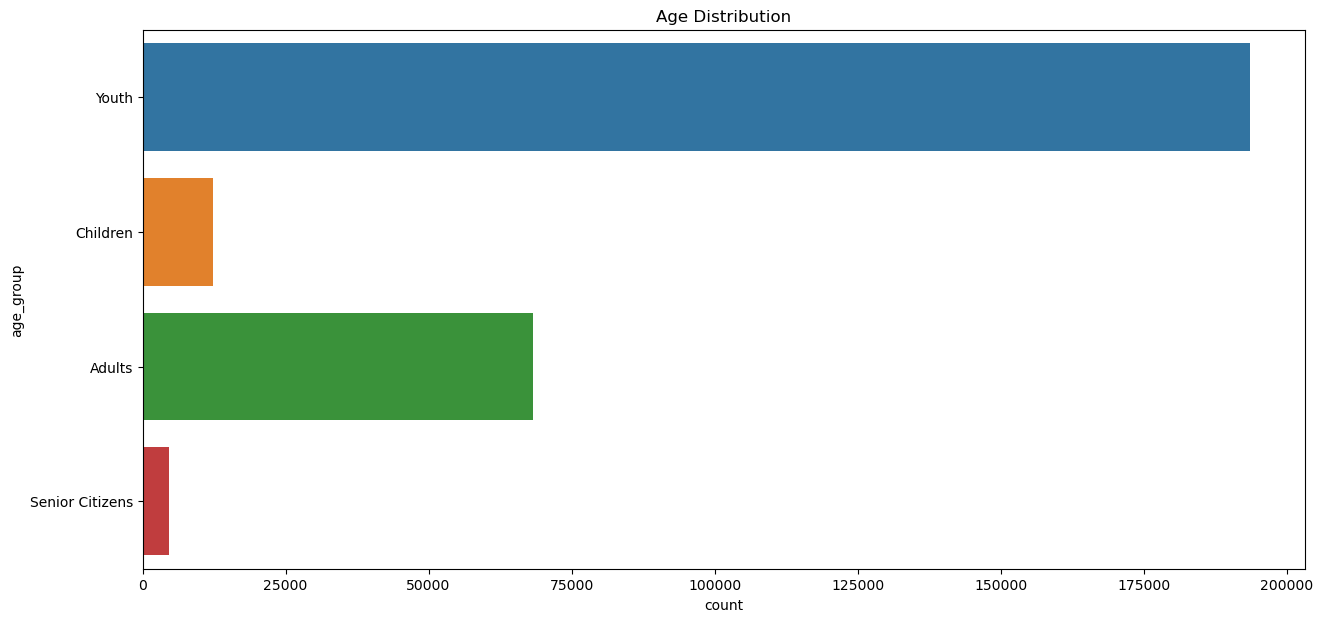

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(y='age_group',data=users)
plt.title('Age Distribution')

In [41]:
users.location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

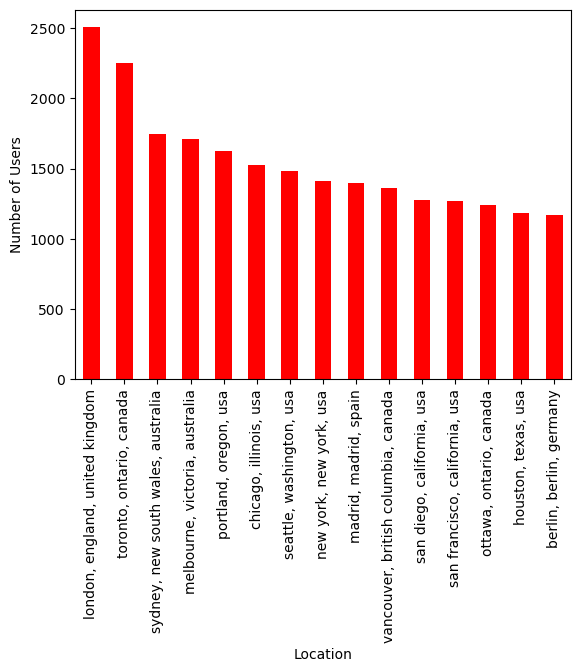

In [42]:
# Users by Location
users_by_location = users['location'].value_counts().head(15)
users_by_location.plot(kind='bar',color="red")
plt.xlabel('Location')
plt.ylabel('Number of Users')

plt.show()

In [43]:
import re

# Define a function to extract country name
def extract_country(location):
    country = re.findall(r'\,+\s?(\w*\s?\w*)\"*$', location)
    if country:
        return country[0]
    else:
        return None

# Apply the function to the location column
users['country'] = users['location'].apply(extract_country)

In [44]:
users.isnull().sum()

userid         0
location       0
age            0
age_group      0
country      368
dtype: int64

In [45]:
users['country']=users['country'].astype('str')

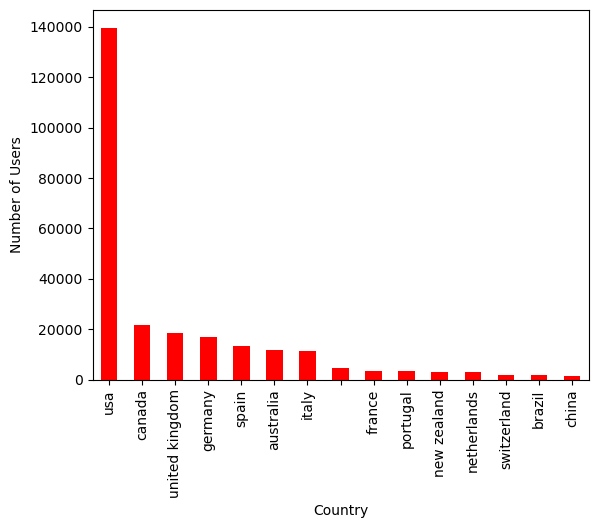

In [46]:
# Users by Country
users_by_location = users['country'].value_counts().head(15)
users_by_location.plot(kind='bar',color="red")
plt.xlabel('Country')
plt.ylabel('Number of Users')

plt.show()

### Ratings

In [47]:
ratings.rating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: rating, dtype: int64

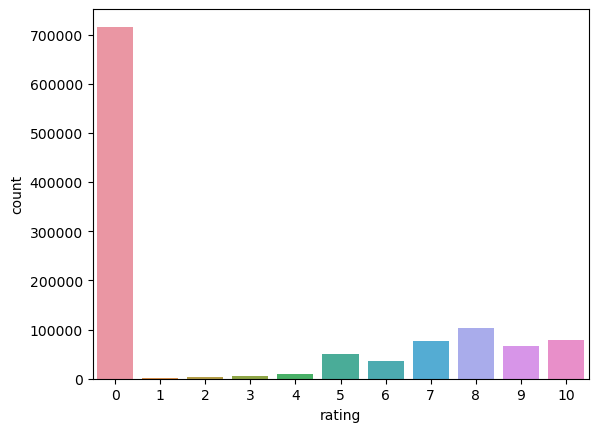

In [48]:
# Distribution of ratings
sns.countplot(x='rating', data=ratings)
plt.show()

## Relation Between Book and Ratings

In [49]:
# Merge the datasets
data = pd.merge(ratings, books, on='isbn')
data

,userid,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031127,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031128,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031129,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031130,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [50]:
data.isnull().sum()

userid         0
isbn           0
rating         0
title          0
author         0
year           0
publisher      0
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

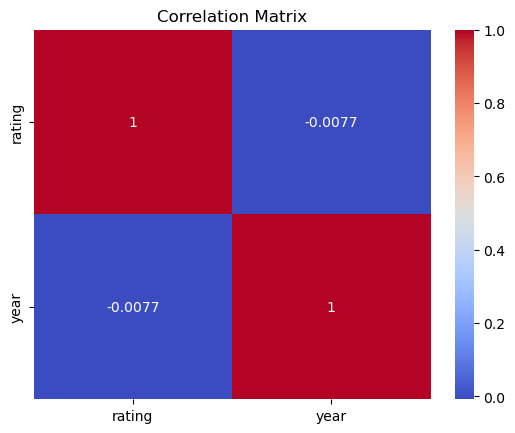

In [51]:
# explore relationships between columns

# Correlation matrix
corr = data[['rating', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [52]:
ratings_df = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_df.rename({'rating':'Mean Ratings'}, axis=1 , inplace =True)
ratings_df['No of times Rated'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings_df

,Mean Ratings,No of times Rated
title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000,4
Always Have Popsicles,0.000000,1
Apple Magic (The Collector's series),0.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000,1
...,...,...
Ã?Â?lpiraten.,0.000000,2
Ã?Â?rger mit Produkt X. Roman.,5.250000,4
Ã?Â?sterlich leben.,7.000000,1


<Figure size 1000x400 with 0 Axes>

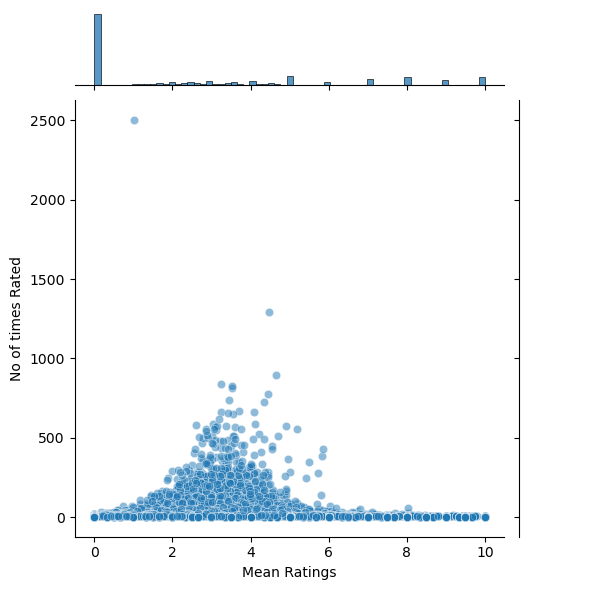

In [53]:
plt.figure(figsize=(10,4), dpi=100)
sns.jointplot(x='Mean Ratings',y='No of times Rated',data=ratings_df,alpha=0.5)
plt.show()

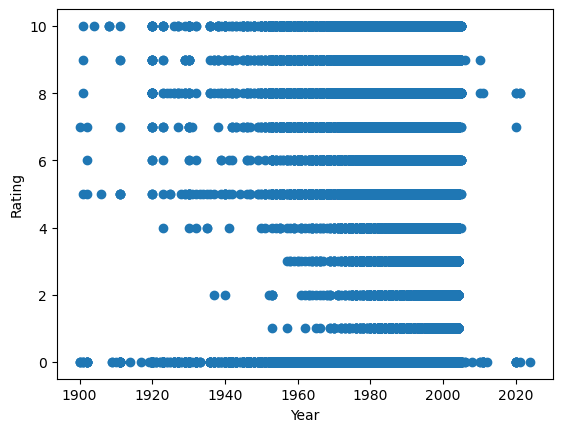

In [54]:
# Create a scatter plot
import matplotlib.pyplot as plt

# Filter the dataframe to include only books published between 1900 and 2025
df_filtered = data[(data["year"] >= 1900) & (data["year"] <= 2025)]

# Create a scatter plot of ratings versus year
plt.scatter(df_filtered["year"], df_filtered["rating"])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

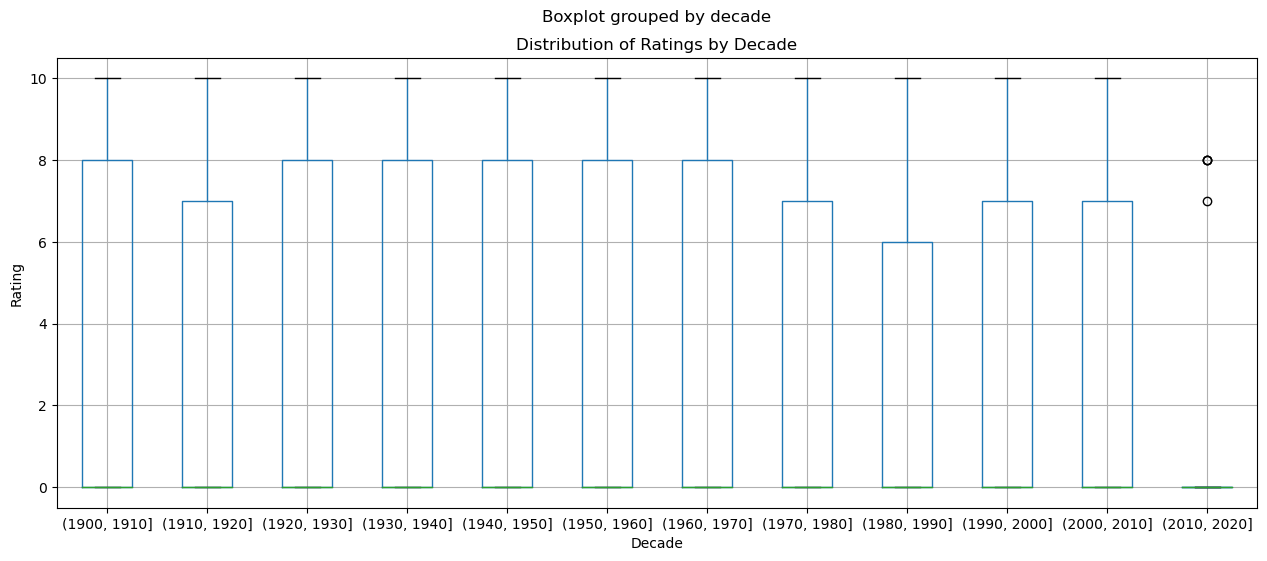

In [55]:
# Group the data by decade
data['decade'] = pd.cut(data['year'], bins=range(1900, 2030, 10))

# Create a box plot for each decade
data.boxplot(column='rating', by='decade', figsize=(15, 6))

# Set the axis labels and title
plt.xlabel("Decade")
plt.ylabel("Rating")
plt.title("Distribution of Ratings by Decade")

# Show the plot
plt.show()

In [56]:
popular_books = pd.DataFrame(data.groupby('title')['rating'].count())
most_popular = popular_books.sort_values('rating', ascending=False)
most_popular.rename({'rating':'No of times Rated'}, axis=1, inplace=True)
most_popular.head(10)

,No of times Rated
title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723


<Figure size 2400x1600 with 0 Axes>

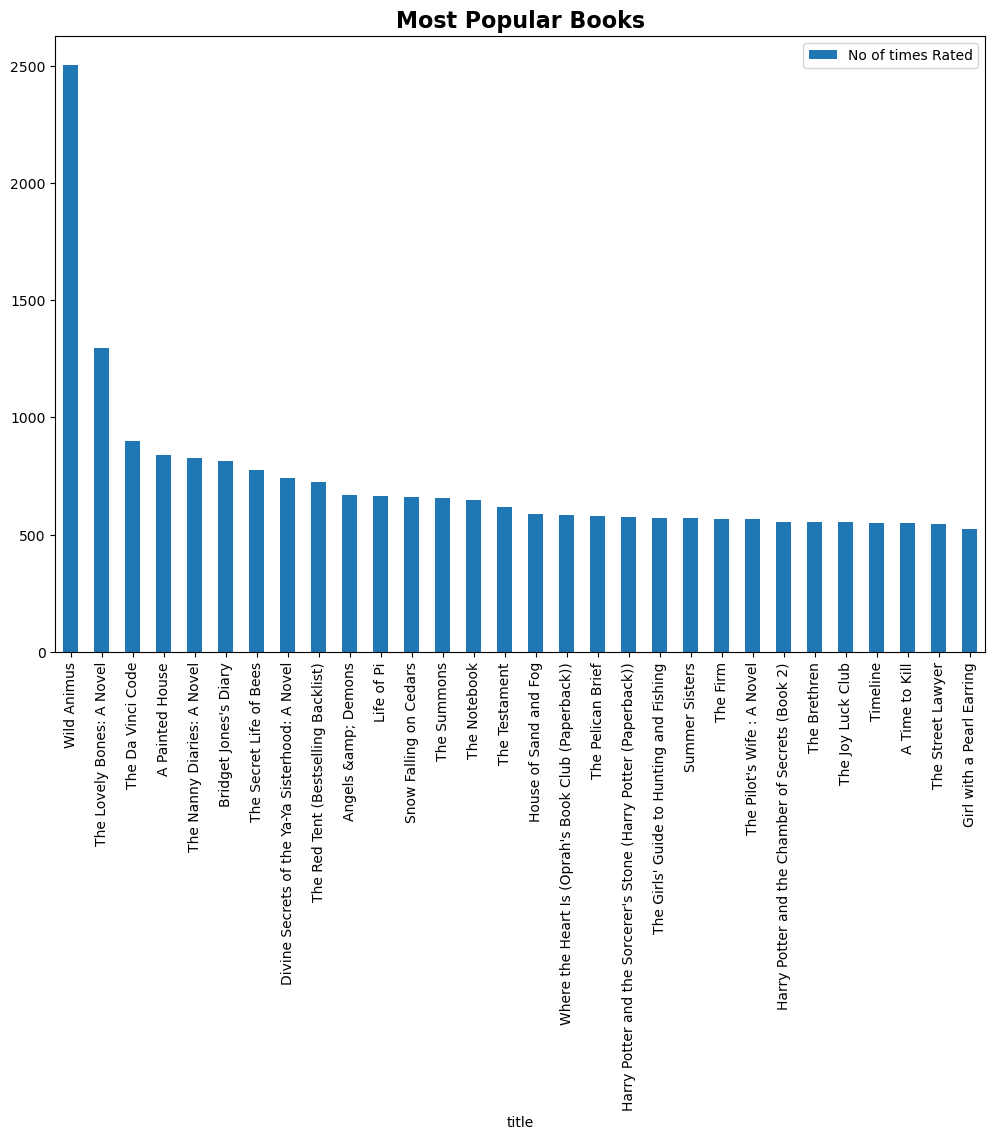

In [57]:
plt.figure(figsize=(12,8), dpi=200)
most_popular.head(30).plot(kind = "bar",figsize=(12,8))
plt.title('Most Popular Books',  fontsize = 16, fontweight = 'bold')
plt.show()

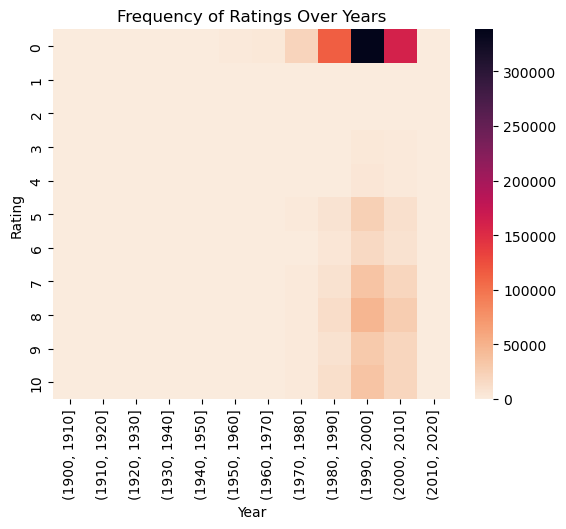

In [58]:
# Heatmap
data['decade'] = pd.cut(data['year'], bins=range(1900, 2030, 10))
rating_freq = data.pivot_table(index='rating', columns='decade', values='isbn', aggfunc='count')

cmap = sns.cm.rocket_r 
sns.heatmap(rating_freq, cmap=cmap)
plt.title("Frequency of Ratings Over Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

# Model Building

In [59]:
data.head()

,userid,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l,decade
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]"
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]"
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]"
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]"


In [60]:
users.head()

,userid,location,age,age_group,country
0,1,"nyc, new york, usa",32.0,Youth,usa
1,2,"stockton, california, usa",18.0,Youth,usa
2,3,"moscow, yukon territory, russia",32.0,Youth,russia
3,4,"porto, v.n.gaia, portugal",17.0,Children,portugal
4,5,"farnborough, hants, united kingdom",32.0,Youth,united kingdom


In [61]:
# merging the data and users dataset with respect to userid
final=pd.merge(data,users,on='userid')
final.head()

,userid,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l,decade,location,age,age_group,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","tyler, texas, usa",32.0,Youth,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","cincinnati, ohio, usa",23.0,Youth,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"(1980, 1990]","cincinnati, ohio, usa",23.0,Youth,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"(1990, 2000]","cincinnati, ohio, usa",23.0,Youth,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"(1990, 2000]","cincinnati, ohio, usa",23.0,Youth,usa


In [62]:
# merging the final and ratings_df dataset with respect to title
final=pd.merge(final,ratings_df,on='title')
final.head()

,userid,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l,decade,location,age,age_group,country,Mean Ratings,No of times Rated
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","tyler, texas, usa",32.0,Youth,usa,2.933333,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","cincinnati, ohio, usa",23.0,Youth,usa,2.933333,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","strafford, missouri, usa",34.0,Youth,usa,2.933333,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","st. charles county, missouri, usa",2.0,Children,usa,2.933333,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"(2000, 2010]","beaverton, oregon, usa",32.0,Youth,usa,2.933333,60


In [63]:
# removing the columns named 'image_url_s','image_url_m','image_url_l','decade' which may not help in model building
final=final.drop(['image_url_s','image_url_l','decade'],axis=1)
final.head()

,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country,Mean Ratings,No of times Rated
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0,Youth,usa,2.933333,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,Youth,usa,2.933333,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"strafford, missouri, usa",34.0,Youth,usa,2.933333,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. charles county, missouri, usa",2.0,Children,usa,2.933333,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"beaverton, oregon, usa",32.0,Youth,usa,2.933333,60


In [64]:
final = final.rename(columns={
    'Mean Ratings': 'avg_rating',
    'No of times Rated': 'no:of_users_rated'})

In [65]:
final.shape

(1031132, 14)

In [66]:
# explicit data
final_explicit=final[final['rating']!=0]
final_explicit=final_explicit.reset_index(drop=True)
print(final_explicit.shape)
final_explicit.head()

(383841, 14)


,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country,avg_rating,no:of_users_rated
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,Youth,usa,2.933333,60
1,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. charles county, missouri, usa",2.0,Children,usa,2.933333,60
2,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"beaverton, oregon, usa",32.0,Youth,usa,2.933333,60
3,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"conway, arkansas, usa",32.0,Youth,usa,2.933333,60
4,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"springfield, missouri, usa",32.0,Youth,usa,2.933333,60


In [67]:
# Implicit data
final_implicit=final[final['rating']==0]
final_implicit=final_implicit.reset_index(drop=True)
print(final_implicit.shape)
final_implicit.head()

(647291, 14)


,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country,avg_rating,no:of_users_rated
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0,Youth,usa,2.933333,60
1,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"strafford, missouri, usa",34.0,Youth,usa,2.933333,60
2,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. louis, missouri, usa",45.0,Adults,usa,2.933333,60
3,28266,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"portland, oregon, usa",32.0,Youth,usa,2.933333,60
4,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"springfield, missouri, usa",24.0,Youth,usa,2.933333,60


In [68]:
final.isna().sum()

userid               0
isbn                 0
rating               0
title                0
author               0
year                 0
publisher            0
image_url_m          0
location             0
age                  0
age_group            0
country              0
avg_rating           0
no:of_users_rated    0
dtype: int64

## 1. Popularity based filtering

- Popularity-based filtering is a type of recommendation algorithm that recommends items to users based on their overall popularity or ratings, without taking into account the preferences or behaviors of individual users. 
- It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

Book weighted avg formula:

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]

where,

v is the number of votes for the books;

m is the minimum votes required to be listed in the chart;

R is the average rating of the book; and

C is the mean vote across the whole report.

Now we find the values of v,m,R,C.

In [69]:
C=final_explicit['avg_rating'].mean()
m=final_explicit['no:of_users_rated'].quantile(0.90)
top_books=final_explicit.loc[final_explicit['no:of_users_rated'] >= m]
print(f'C={C} , m={m}')
top_books.shape

C=4.148170448142407 , m=219.0


(38506, 14)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 103744 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [70]:
def weighted_rating(x, m=m, C=C):
    v = x['no:of_users_rated']
    R = x['avg_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
top_books['Score'] = top_books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
top_books = top_books.sort_values('Score', ascending=False)

In [71]:
#Keeping only one entry of each book
top_books=top_books.sort_values('Score', ascending=False).drop_duplicates('title').sort_index()
cm=sns.light_palette('green',as_cmap=True)

#Sorting books based on score calculated above
top_books = top_books.sort_values('Score', ascending=False)

#Printing the top 30 books
top_books[['title','no:of_users_rated', 'avg_rating', 'Score']].reset_index(drop=True).head(30).style.background_gradient(cmap=cm)

,title,no:of_users_rated,avg_rating,Score
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.275810
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.218563
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.037121
3,Harry Potter and the Order of the Phoenix (Book 5),347,5.501441,4.977826
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,4.890902
5,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,4.819336
6,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575,4.895652,4.689483
7,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",368,4.948370,4.649828
8,The Hobbit : The Enchanting Prelude to The Lord of the Rings,281,5.007117,4.630899
9,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,4.545823


## Collaborative filtering

The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users.

In [72]:
final_rating=final_explicit[final_explicit['no:of_users_rated']>=20]
final_rating.head()

,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country,avg_rating,no:of_users_rated
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,Youth,usa,2.933333,60
1,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. charles county, missouri, usa",2.0,Children,usa,2.933333,60
2,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"beaverton, oregon, usa",32.0,Youth,usa,2.933333,60
3,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"conway, arkansas, usa",32.0,Youth,usa,2.933333,60
4,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"springfield, missouri, usa",32.0,Youth,usa,2.933333,60


In [73]:
#creating the pivot table
pt=book_pivot=final_rating.pivot_table(columns="userid",index='title',values="rating")

In [74]:
book_pivot

userid,8,9,16,17,19,26,32,39,42,44,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-01-00: The Novel of the Millennium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001 Ways to Be Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
book_pivot.fillna(0,inplace=True)

In [76]:
book_pivot

userid,8,9,16,17,19,26,32,39,42,44,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Nearest Neighbour

since we dont want to calculate the distancce betwen the 0 valuesand we need only to calulate the distance between the values we will use the CSR matrix.

while calculating the distance the csr matrix will neglect the zeros and will only calculate the distance between the valuess

In [77]:
from scipy.sparse import csr_matrix

In [78]:
book_sparse=csr_matrix(book_pivot)

In [79]:
book_sparse

<7606x43766 sparse matrix of type '<class 'numpy.float64'>'
	with 169964 stored elements in Compressed Sparse Row format>

In [80]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [81]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [82]:
distance , suggestion = model.kneighbors(book_pivot.iloc[857,:].values.reshape(1,-1),n_neighbors=10)

In [83]:
distance

array([[ 0.        , 26.98147513, 26.98147513, 27.27636339, 27.38612788,
        27.4226184 , 27.4226184 , 27.4226184 , 27.44084547, 27.44084547]])

In [84]:
suggestion

array([[ 857, 2593, 4034, 4093, 1277, 6001, 1749, 2301, 6046, 3829]],
      dtype=int64)

In [85]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Body and Soul', 'Hot Flashes', 'POSSESSIONS',
       'Pearl Harbor Movie Tie-In', 'Courting Susannah', 'The Hope : A Novel',
       'Dying to Have Her', 'Go Eat Worms! (Goosebumps, No 21)',
       'The Immigrants',
       'No Word from Winifred (Kate Fansler Novels (Paperback))'],
      dtype='object', name='title')


In [86]:
book_pivot.index[857]

'Body and Soul'

In [87]:
def recommend_book(book_name):
    book_id=np.where(book_pivot.index==book_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=10);
    
    for i in range(len(suggestion)):
        books=book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [88]:
recommend_book("Harry Potter and the Goblet of Fire (Book 4)")

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
REMEMBRANCE : REMEMBRANCE
Kissed by Shadows (Get Connected Romances)
Yuletide Brides (2 Novels in 1)
Waiting for the Moon
The INTRUDERS
The Nightingale Legacy
Rules of Surrender (Governess Brides)
Absolutely, Positively


### 3. Cosine Similarity

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
similarity_scores = cosine_similarity(book_pivot)

In [91]:
similarity_scores.shape

(7606, 7606)

In [92]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:10]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['image_URL_m'].values))
        
        data.append(item)
    
    return data

In [93]:
recommend_book('Home Song')

Home Song
Confession
Once upon a Castle
Rules of Surrender (Governess Brides)
The Observatory : A Novel
Courting Susannah
A Year and a Day
The Day Before Midnight
The Greatest Generation Speaks : Letters and Reflections
Corruption of Blood


In [94]:
final.head()

,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country,avg_rating,no:of_users_rated
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0,Youth,usa,2.933333,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,Youth,usa,2.933333,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"strafford, missouri, usa",34.0,Youth,usa,2.933333,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. charles county, missouri, usa",2.0,Children,usa,2.933333,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"beaverton, oregon, usa",32.0,Youth,usa,2.933333,60


In [95]:
f=final.drop(['avg_rating','no:of_users_rated'],axis=1)
f

,userid,isbn,rating,title,author,year,publisher,image_url_m,location,age,age_group,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0,Youth,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,Youth,usa
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"strafford, missouri, usa",34.0,Youth,usa
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"st. charles county, missouri, usa",2.0,Children,usa
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"beaverton, oregon, usa",32.0,Youth,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
1031127,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0,Adults,switzerland
1031128,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",32.0,Youth,germany
1031129,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0,Children,usa
1031130,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0,Children,usa
